In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dados = pd.read_csv("/kaggle/input/water-quality/waterQuality1.csv")

In [4]:
dados.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


Checking for possible outliers:

In [3]:
dados.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


No Missing Data:

In [5]:
dados.isna().any(axis=None)

False

One column has categorical data in it

In [37]:
len(dados.columns)

21

In [38]:
len(dados._get_numeric_data().columns)

19

In [39]:
dados = dados.apply(pd.to_numeric, errors='coerce')

In [44]:
dados.iloc[7551]# data as NaN was in a bad format, #num!. Impossible to impute data.

aluminium      0.030
ammonia          NaN
arsenic        0.080
barium         0.790
cadmium        0.070
chloramine     0.080
chromium       0.050
copper         0.580
flouride       0.340
bacteria       0.000
viruses        0.000
lead           0.183
nitrates       4.370
nitrites       1.430
mercury        0.007
perchlorate    0.620
radium         2.540
selenium       0.070
silver         0.050
uranium        0.050
is_safe          NaN
Name: 7551, dtype: float64

In [45]:
dados = dados.dropna()

In [46]:
dados.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [60]:
X = dados.drop(["is_safe"],axis = 1)
y = dados[["is_safe"]]

In [61]:
trainX, testX, trainy, testy = train_test_split(X,y,test_size = 0.25,random_state=323,stratify=y)
print(trainX,testX,trainy,testy)

      aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
7698       0.01     0.49     0.04    0.38    0.000        0.11      0.08   
7884       0.07     2.14     0.06    2.67    0.100        0.34      0.08   
2855       0.01     6.71     0.01    1.66    0.009        1.82      0.14   
780        2.99     3.76     0.04    2.24    0.006        0.51      0.40   
6800       0.00    25.57     0.02    0.86    0.080        0.10      0.07   
...         ...      ...      ...     ...      ...         ...       ...   
3620       0.05    22.77     0.75    1.44    0.070        5.41      0.85   
362        0.78     6.58     0.01    3.38    0.006        1.80      0.53   
3767       0.20     2.55     0.52    2.32    0.090        6.46      0.57   
2488       0.17    27.35     0.03    0.96    0.005        7.79      0.65   
7371       0.04     2.76     0.05    1.29    0.080        0.02      0.01   

      copper  flouride  bacteria  viruses   lead  nitrates  nitrites  mercury  \
7698  

Knowledge extraction

In [62]:
model = DecisionTreeClassifier(random_state = 2,max_depth = 2)
model.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=2)

In [63]:
print(model.feature_importances_)
print(X.columns)

[0.45085775 0.         0.         0.         0.54914225 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium'],
      dtype='object')


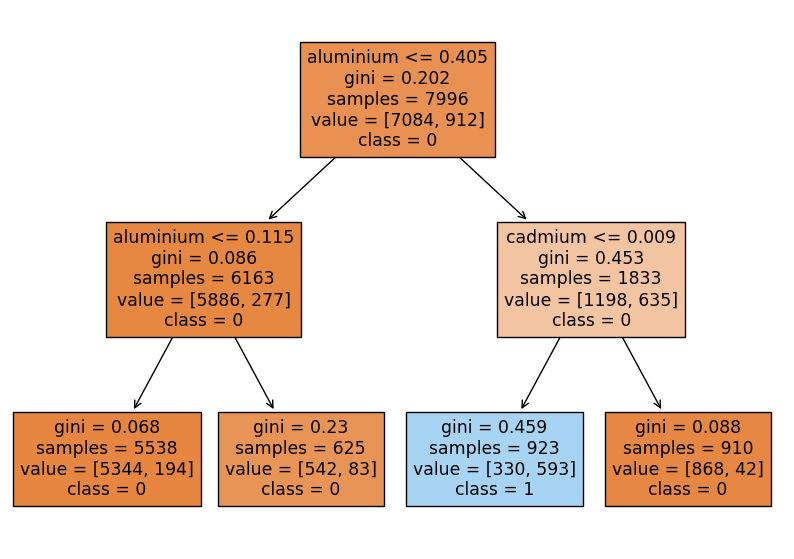

In [64]:
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 7))
tree.plot_tree(model, feature_names = X.columns,
              class_names = ['0','1'], filled = True)
plt.show()

In [65]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)

# Decision Tree

In [66]:
model = DecisionTreeClassifier(random_state = 2,max_depth = 2)
model.fit(trainX,trainy)
predicted = model.predict(testX)
predicted

array([0., 0., 0., ..., 0., 0., 0.])

In [98]:
model.predict_proba(testX)

array([[0.86516854, 0.13483146],
       [0.86516854, 0.13483146],
       [0.96426859, 0.03573141],
       ...,
       [0.96426859, 0.03573141],
       [0.96426859, 0.03573141],
       [0.96426859, 0.03573141]])

In [99]:
model.predict_proba(testX)[:, 1]#predictions of positive class (healthy water)

array([0.13483146, 0.13483146, 0.03573141, ..., 0.03573141, 0.03573141,
       0.03573141])

In [100]:
from sklearn import metrics as mtr

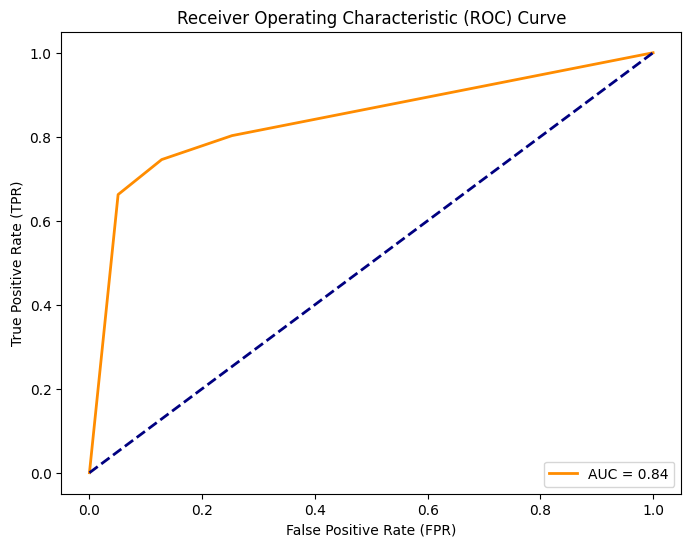

In [101]:
# Predict probabilities for the positive class
probs = model.predict_proba(testX)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = mtr.roc_curve(testy, probs)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = mtr.auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Naive Bayes

In [103]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(trainX,trainy)
predicted = model.predict_proba(testX)
predicted

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.96669943, 0.03330057],
       [0.91411878, 0.08588122],
       [0.92630138, 0.07369862],
       ...,
       [0.79104208, 0.20895792],
       [0.94513693, 0.05486307],
       [0.9599486 , 0.0400514 ]])

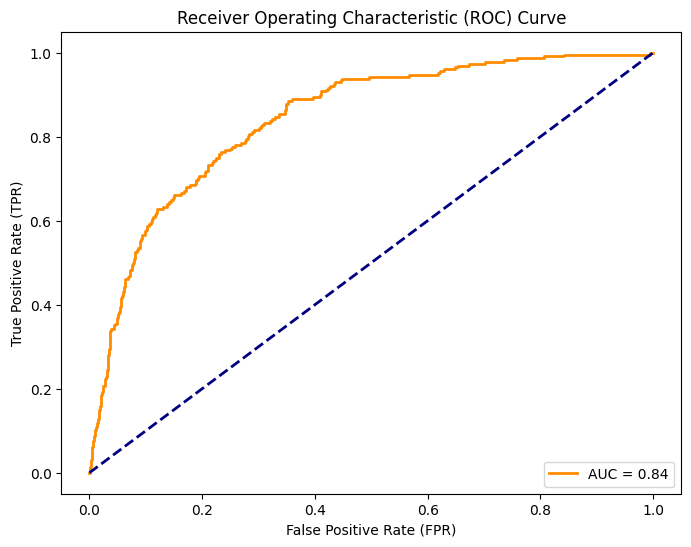

In [104]:
# Predict probabilities for the positive class
probs = predicted[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = mtr.roc_curve(testy, probs)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = mtr.auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=2)
model.fit(trainX,trainy)
predicted = model.predict_proba(testX)
predicted

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.99861252, 0.00138748],
       [0.86107738, 0.13892262],
       [0.91073155, 0.08926845],
       ...,
       [0.51470889, 0.48529111],
       [0.92971003, 0.07028997],
       [0.98145886, 0.01854114]])

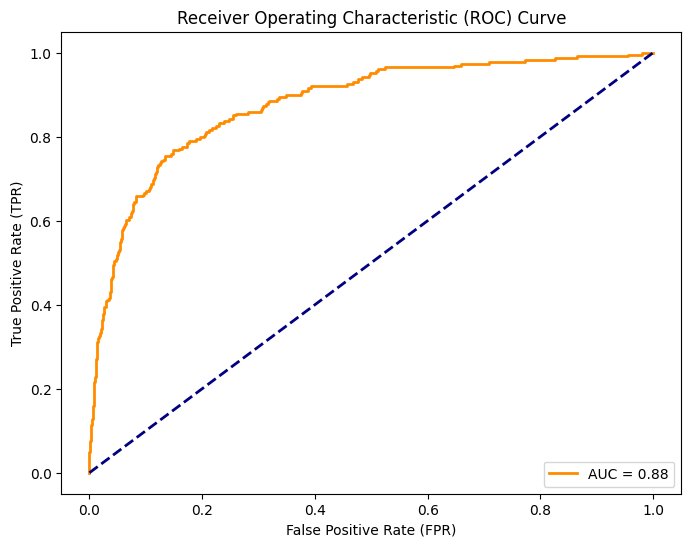

In [106]:
# Predict probabilities for the positive class
probs = predicted[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = mtr.roc_curve(testy, probs)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = mtr.auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Knn

In [110]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(trainX,trainy)
predicted = model.predict_proba(testX)
predicted


/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([[1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       ...,
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ]])

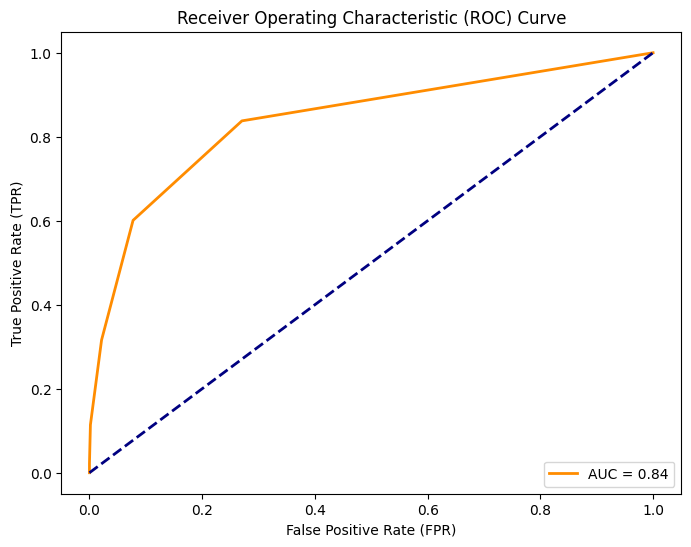

In [111]:
# Predict probabilities for the positive class
probs = predicted[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = mtr.roc_curve(testy, probs)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = mtr.auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=2)
model.fit(trainX,trainy)
predicted = model.predict_proba(testX)
predicted

/tmp/ipykernel_33/833855666.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(trainX,trainy)


array([[0.97, 0.03],
       [0.94, 0.06],
       [0.63, 0.37],
       ...,
       [0.86, 0.14],
       [0.72, 0.28],
       [0.99, 0.01]])

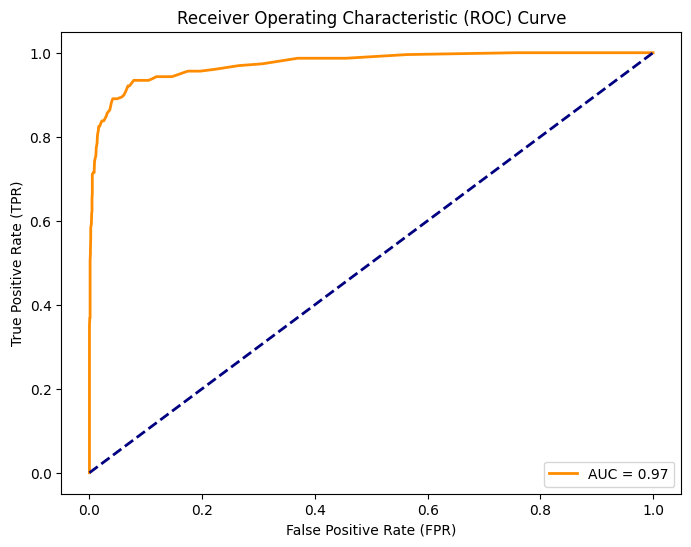

In [113]:
# Predict probabilities for the positive class
probs = predicted[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = mtr.roc_curve(testy, probs)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = mtr.auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Com base na avaliação da Área Sob a Curva ROC (AUC), o Random Forest Classifier destacou-se como o melhor modelo entre as opções consideradas, que incluíam Decision Tree, Regressão Logística, Naive Bayes e kNN. A AUC é uma métrica eficaz para medir a capacidade discriminativa de um modelo de classificação, refletindo a sua habilidade em distinguir entre classes positivas e negativas. Neste contexto, o Random Forest Classifier demonstrou um desempenho superior, indicando uma maior capacidade de generalização e robustez na classificação, quando comparado aos outros algoritmos avaliados. Essa conclusão respalda a escolha do Random Forest como a opção preferencial para o problema em questão, considerando a importância da precisão na discriminação das classes no contexto do modelo de machine learning.